# Running ares for default parameters

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

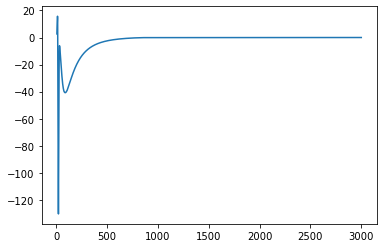

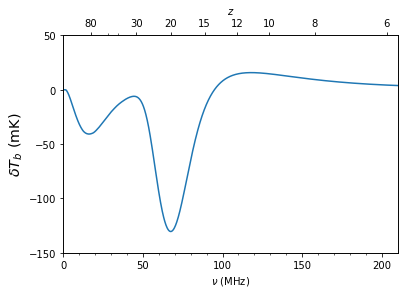

In [3]:
import ares

sim = ares.simulations.Global21cm()     # Initialize a simulation object
sim.run()  

import matplotlib.pyplot as plt

plt.plot(sim.history['z'], sim.history['dTb'])
sim.GlobalSignature(fig=2)

sim.save('test_21cm', clobber=True)
plt.savefig('ares_gs_default.png')

# Saving the data as a .txt file


In [41]:
fhand = open("ares00.txt","r+") 
fhand.write("dTb\tz\t nu\n")
seq = []

for i in range(len(sim.history['z'])):
    seq = [str(sim.history['dTb'][i]), "\t", str(sim.history['z'][i]), "\t", str(sim.history['nu'][i]), "\n"]
    fhand.writelines(seq)
               
fhand.close()

# Running ares for changing fx parameter.

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x      

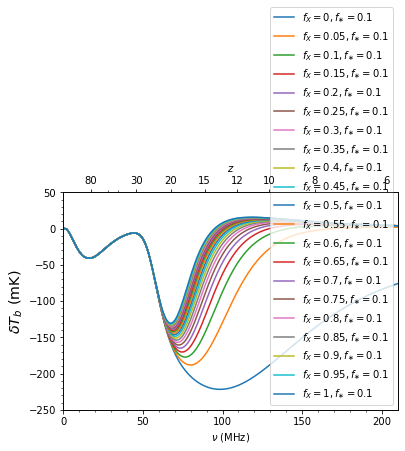

In [117]:
import time
start_time = time.time()

import numpy as np
ax = None
nfx = 21  ## number of iterations for fx
fxs = np.linspace(0,1,nfx)

# lenz = len(sim.history['z'])
lenz = 2588
# len(sim.history['z']) or 2588
### dTbs: 2d array for saving dTb for different fxs
dTbs = np.zeros([nfx,lenz])

for i, fX in enumerate(fxs):
    for j, fstar in enumerate([0.1]):
        sim = ares.simulations.Global21cm(fX=fX, fstar=fstar)
        sim.run()
        dTbs[i][:] = sim.history['dTb']
#         print(i, fX, j, fstar)
        
        # Plot the global signal
        ax, zax = sim.GlobalSignature(ax=ax, fig=3, z_ax=i==j==0,
            label=r'$f_X=%.2g, f_{\ast}=%.2g$' % (fX, fstar))


ax.legend(loc='lower right', fontsize=10)
plt.savefig('ares_gs_diy_param_study.pdf')

print("--- %s seconds ---" % (time.time() - start_time))

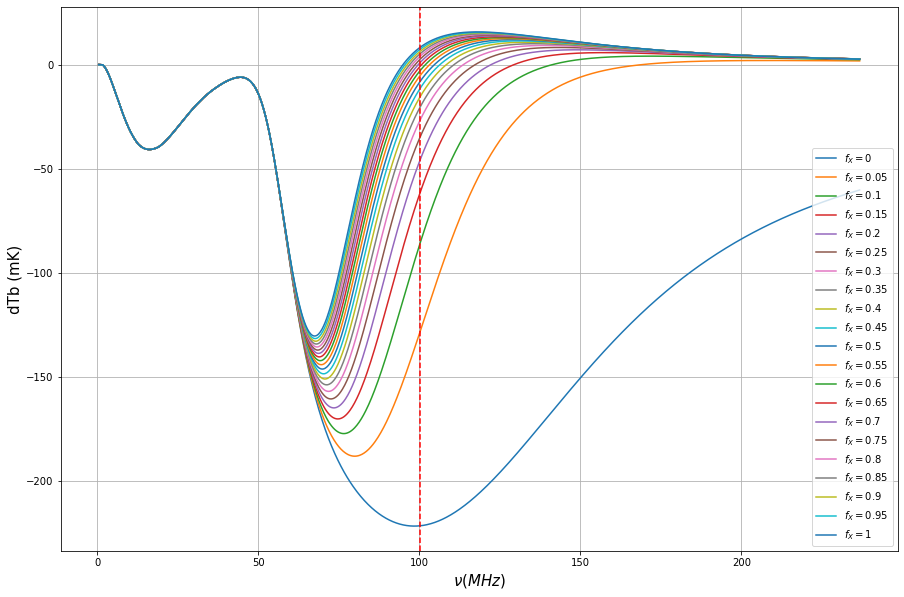

In [282]:
# print(dTbs,'\n')
plt.subplots(figsize=(15,10))
nu = sim.history['nu']

for i in range(dTbs.shape[0]):
    plt.plot(nu, dTbs[i][:], 
             label=r'$f_X=%.2g$' %fxs[i])
plt.axvline(x=100.07126795356919, color= 'r', linestyle='--')
plt.xlabel(r'$\nu (MHz)$', fontsize= 15);plt.ylabel('dTb (mK)', fontsize= 15)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.savefig('dTb_vs_nu.pdf')
# print(dTbs.shape[0], dTbs.shape[1])

# Plotting dTb as a function of fx for a fixed z/nu

In [186]:
print(fxs)
print(nu[1740])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
100.07126795356919


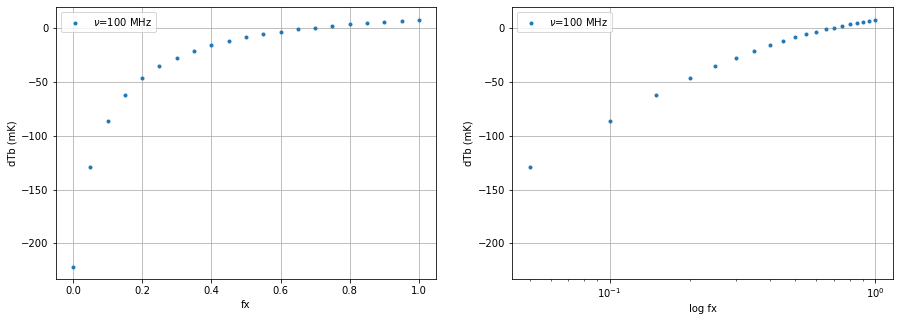

In [146]:
##defining a array for storing the dTs as a function of fxs.
dT_nu = np.zeros(nfx)
for i in range(nfx):
    dT_nu[i] = dTbs[i][1740]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].plot(fxs, dT_nu, '.', label = r'$\nu$=100 MHz')
ax[0].set_xlabel('fx');ax[0].set_ylabel('dTb (mK)')
ax[0].grid();ax[0].legend()

ax[1].semilogx(fxs, dT_nu, '.', label = r'$\nu$=100 MHz')
ax[1].set_xlabel('log fx');ax[1].set_ylabel('dTb (mK)')
ax[1].grid();ax[1].legend()

plt.savefig('dtb_vs_fx.pdf')
# print(min(nu))
# nu[1740]

# plotting the curvature

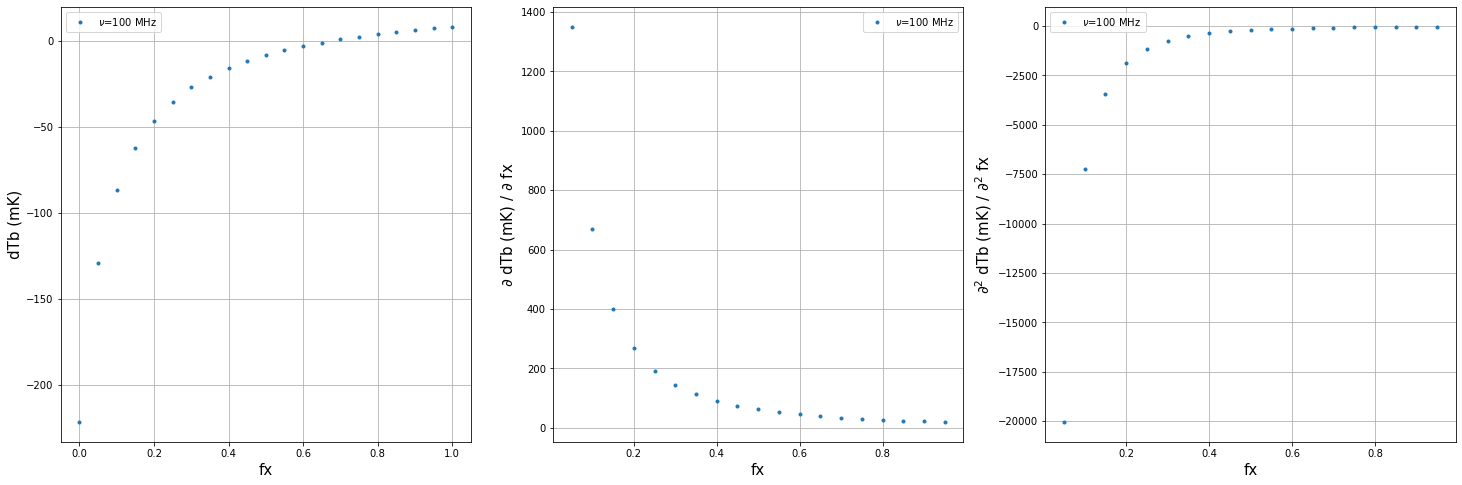

In [172]:
import functions as f

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

ax[0].plot(fxs, dT_nu, '.', label = r'$\nu$=100 MHz')
ax[0].set_xlabel('fx', fontsize= 15);ax[0].set_ylabel('dTb (mK)', fontsize= 15)
ax[0].grid();ax[0].legend()

ax[1].plot(fxs[1:-1], f.partial(dT_nu,fxs)[1:-1], '.', label = r'$\nu$=100 MHz')
ax[1].set_xlabel('fx', fontsize= 15);ax[1].set_ylabel('$\partial$ dTb (mK) / $\partial$ fx', fontsize= 15)
ax[1].grid();ax[1].legend()

ax[2].plot(fxs[1:-1], f.partial2(dT_nu,fxs)[1:-1], '.', label = r'$\nu$=100 MHz')
ax[2].set_xlabel('fx', fontsize= 15);ax[2].set_ylabel('$\partial^2$ dTb (mK) / $\partial^2$ fx', fontsize= 15)
ax[2].grid();ax[2].legend()

plt.savefig('dtb_vs_fx_2nd_derivative.pdf')

# Plotting dTb as a function of fx for various values of z/nu

In [ ]:
##defining a array for storing the dTs as a function of fxs.
dT_nu = np.zeros(nfx)
nu_arr = []
for i in range(nfx):
    dT_nu[i] = dTbs[i][1740]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

ax[0].plot(fxs, dT_nu, '.', label = r'$\nu$=100 MHz')
ax[0].set_xlabel('fx');ax[0].set_ylabel('dTb (mK)')
ax[0].grid();ax[0].legend()

plt.savefig('dtb_vs_fx.pdf')
# print(min(nu))
# nu[1740]

j= 1700 	 nu= 91.58078071146532
j= 1715 	 nu= 94.8094066240517
j= 1731 	 nu= 98.1933797978573
j= 1747 	 nu= 101.51967828872101
j= 1763 	 nu= 104.79206641551241
j= 1778 	 nu= 107.81395737919505
j= 1794 	 nu= 110.99113135595219
j= 1810 	 nu= 114.12330346299765
j= 1826 	 nu= 117.21293861364276
j= 1842 	 nu= 120.26227551772068
j= 1857 	 nu= 123.08624744735663
j= 1873 	 nu= 126.0631601722362
j= 1889 	 nu= 129.0052945679536
j= 1905 	 nu= 131.9142371625409
j= 1921 	 nu= 134.79145269123404
j= 1936 	 nu= 137.46123479133448
j= 1952 	 nu= 140.28075066177098
j= 1968 	 nu= 143.0722533169888
j= 1984 	 nu= 145.83683857191608
j= 2000 	 nu= 148.5755299500007


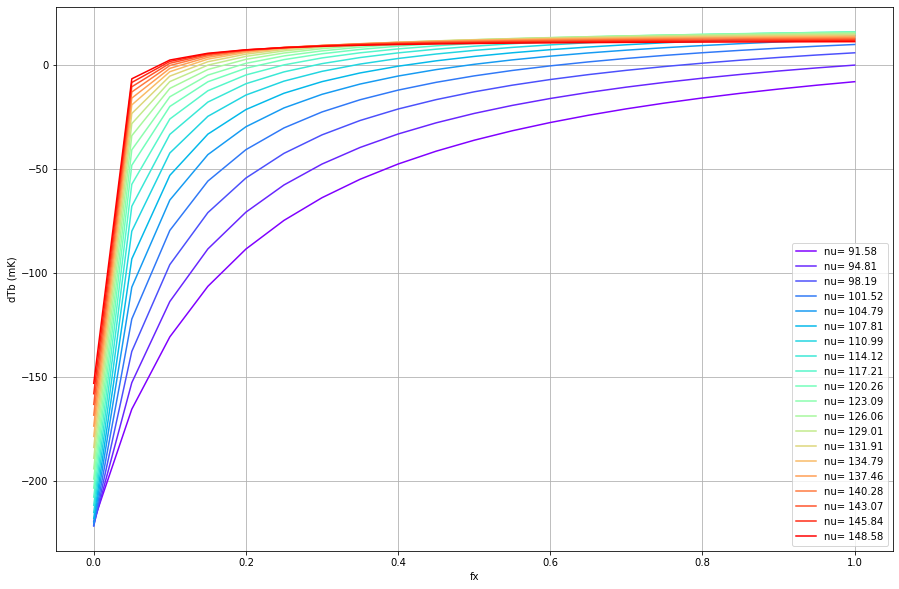

In [354]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
cmap=plt.get_cmap("rainbow")

nu_arr = []
j_array = np.linspace(1700,2000,20)
j_array = j_array.astype(int)
for j in j_array:
    print('j=', j,'\t', 'nu=', nu[j])
    nu_arr.append(nu[j])
    for i in range(nfx):
        dT_nu[i] = dTbs[i][j]
    plt.plot(fxs,dT_nu, label='nu= %2.2f'%nu[j], color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))

axs.set_xlabel('fx');axs.set_ylabel('dTb (mK)')
axs.legend();axs.grid()
plt.savefig('multiple_nu.pdf')
plt.show()

# Plotting the error bars of 10 mK.

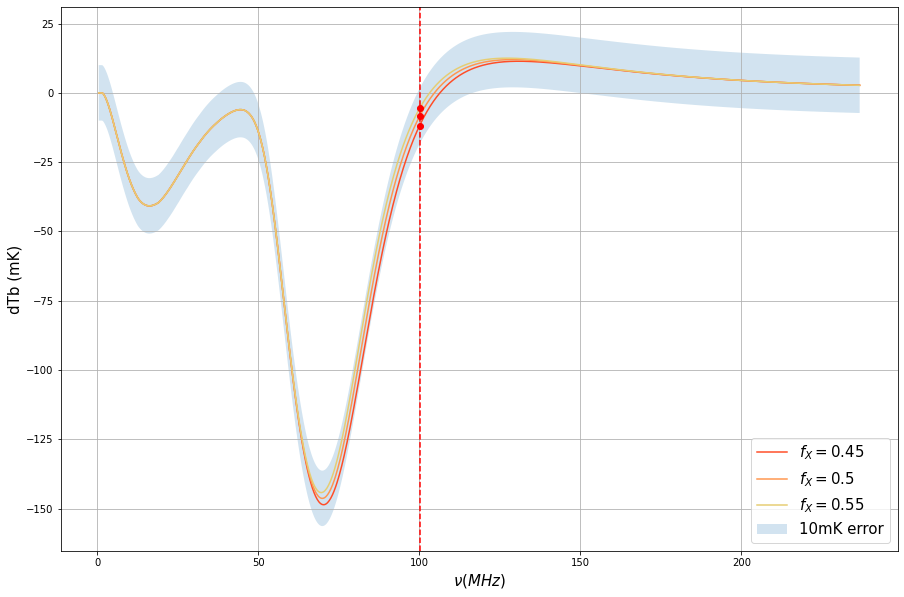

In [350]:
fig, ax1 = plt.subplots(figsize=(15,10))

error = 10 ##mK
upper_dTb = dTbs[10][:]+error ### dTbs[10][:] represents the 10th fx = 0.5
lower_dTb = dTbs[10][:]-error


plt.plot(nu, dTbs[9][:], color= cmap(0.9), label=r'$f_X=%.2g$' %fxs[9])
plt.plot(nu, dTbs[10][:], color= cmap(0.8), label=r'$f_X=%.2g$' %fxs[10])
plt.plot(nu, dTbs[11][:], color= cmap(0.7), label=r'$f_X=%.2g$' %fxs[11])
# plt.plot(nu, dTbs[10][:]+10, 'k--')
# plt.plot(nu, dTbs[10][:]-10, 'k--')
ax1.fill_between(nu, lower_dTb, upper_dTb, alpha = 0.2, label = '10mK error')
plt.scatter(nu[1740], dTbs[9][1740], zorder= 10, color='r')
plt.scatter(nu[1740], dTbs[10][1740], zorder= 10, color='r')
plt.scatter(nu[1740], dTbs[11][1740], zorder= 10, color='r')

ax1.axvline(x=100.07126795356919, color= 'r', linestyle='--')
plt.xlabel(r'$\nu (MHz)$', fontsize= 15);plt.ylabel('dTb (mK)', fontsize= 15)
ax1.legend(loc='lower right', fontsize=15)
plt.grid()
plt.savefig('10mK_errorbar.pdf');plt.show()

# Finding the Fihser matrix for 1-variable situation.
# assuming that the extimator is unbiased

j= 0 	 nu= 0.4733107964011996
j= 625 	 nu= 1.2293580498741394
j= 1250 	 nu= 36.17574004538662
j= 1875 	 nu= 126.43279512594377
j= 2500 	 nu= 224.78233421104014


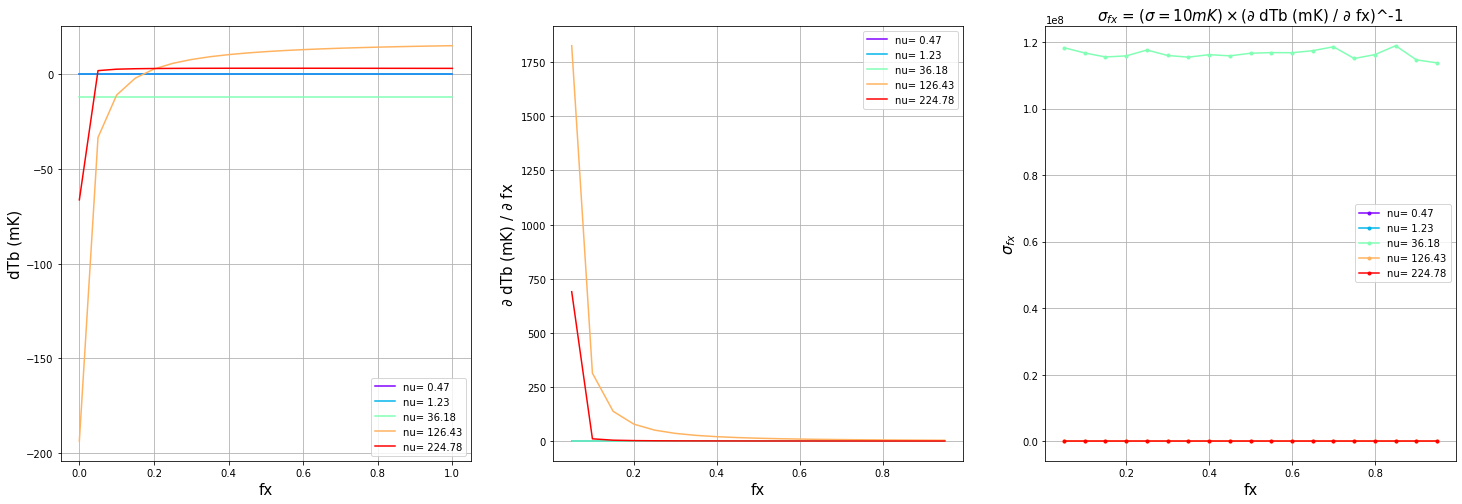

In [376]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(25,8))
cmap=plt.get_cmap("rainbow")

nu_arr = []
j_array = np.linspace(0,2500,5)
j_array = j_array.astype(int)
for j in j_array:
    print('j=', j,'\t', 'nu=', nu[j])
    nu_arr.append(nu[j])
    for i in range(nfx):
        dT_nu[i] = dTbs[i][j]
    axs[0].plot(fxs, dT_nu, label='nu= %2.2f'%nu[j], color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))
    axs[1].plot(fxs[1:-1], f.partial(dT_nu,fxs)[1:-1],
                label='nu= %2.2f'%nu[j], color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))
    axs[2].plot(fxs[1:-1], error / (f.partial(dT_nu,fxs)[1:-1]),
                label='nu= %2.2f'%nu[j], marker='.',
                color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))


axs[0].set_xlabel('fx', fontsize= 15);axs[0].set_ylabel('dTb (mK)', fontsize= 15)
axs[0].legend();axs[0].grid()

axs[1].set_xlabel('fx', fontsize= 15);axs[1].set_ylabel('$\partial$ dTb (mK) / $\partial$ fx', fontsize= 15)
axs[1].legend();axs[1].grid()

axs[2].set_xlabel('fx', fontsize= 15)
axs[2].set_ylabel('$\sigma_{fx}$', fontsize= 15)
axs[2].set_title(r'$\sigma_{fx}$ = $(\sigma = 10mK) \times$($\partial$ dTb (mK) / $\partial$ fx)^-1', fontsize= 15)
axs[2].legend();axs[2].grid()

plt.savefig('multiple_nu_for_deriv.pdf')
plt.show()


j= 1650 	 nu= 80.37059963299987
j= 1712 	 nu= 94.16815484114302
j= 1775 	 nu= 107.21301075421952
j= 1837 	 nu= 119.3135596708607
j= 1900 	 nu= 131.00866735193264


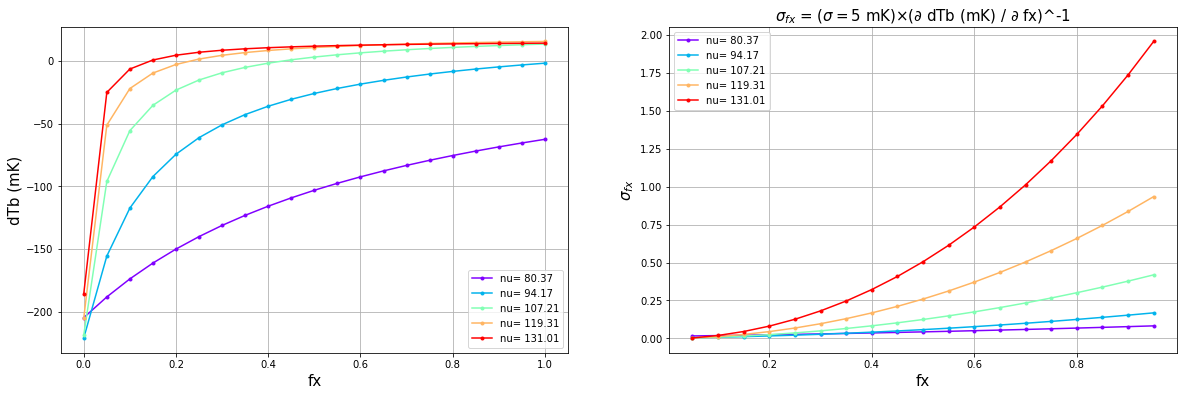

In [425]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
cmap=plt.get_cmap("rainbow")

nu_arr = []
j_array = np.linspace(1650,1900,5)
j_array = j_array.astype(int)
for j in j_array:
    print('j=', j,'\t', 'nu=', nu[j])
    nu_arr.append(nu[j])
    for i in range(nfx):
        dT_nu[i] = dTbs[i][j]
    sigmafx = error / (f.partial(dT_nu,fxs)[1:-1])
    axs[0].plot(fxs, dT_nu,
                label='nu= %2.2f'%nu[j], marker='.',
                color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))
    axs[1].plot(fxs[1:-1], sigmafx, label='nu= %2.2f'%nu[j], marker='.',
                color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))

axs[0].set_xlabel('fx', fontsize= 15);axs[0].set_ylabel('dTb (mK)', fontsize= 15)
axs[0].legend();axs[0].grid()

axs[1].set_xlabel('fx', fontsize= 15)
axs[1].set_ylabel('$\sigma_{fx}$', fontsize= 15)
axs[1].set_title(r'$\sigma_{fx}$ = $(\sigma = %.2g$ mK)$ \times$($\partial$ dTb (mK) / $\partial$ fx)^-1' %error,
              fontsize= 15)
axs[1].legend();axs[1].grid()
plt.savefig('fx_sigma.pdf')
plt.show()

j= 1650 	 nu= 80.37059963299987
j= 1687 	 nu= 88.73557064130726
j= 1725 	 nu= 96.93136536687057
j= 1762 	 nu= 104.58905621637243
j= 1800 	 nu= 112.17083186080706


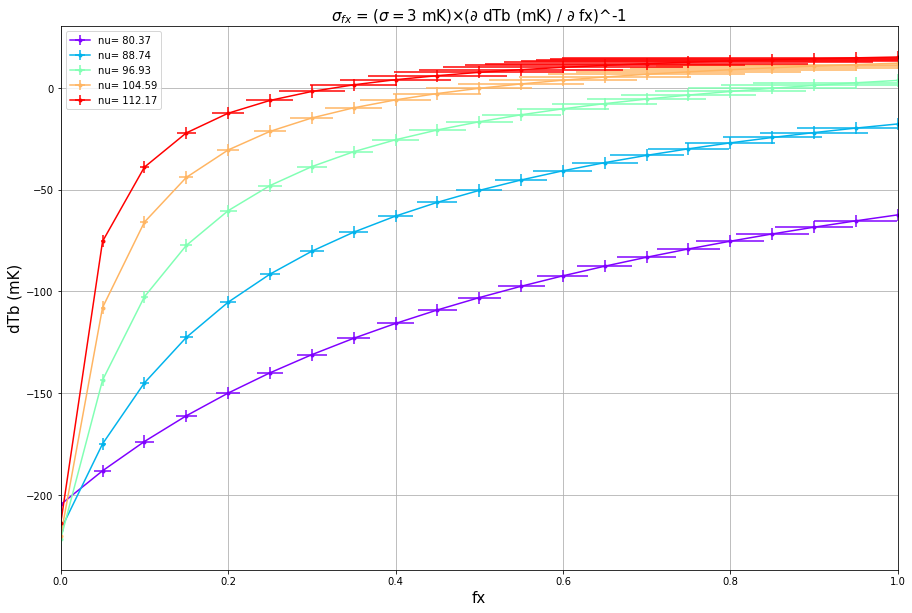

In [428]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
cmap=plt.get_cmap("rainbow")

error = 3 ##mK
nu_arr = []
j_array = np.linspace(1650,1800,5)
j_array = j_array.astype(int)
for j in j_array:
    print('j=', j,'\t', 'nu=', nu[j])
    nu_arr.append(nu[j])
    for i in range(nfx):
        dT_nu[i] = dTbs[i][j]
    sigmafx = error / (f.partial(dT_nu,fxs))
    axs.errorbar(fxs, dT_nu, yerr=error, xerr=sigmafx,
                label='nu= %2.2f'%nu[j], marker='.',
                color= cmap((j-min(j_array))/(max(j_array)-min(j_array))))

axs.set_xlabel('fx', fontsize= 15);axs.set_ylabel('dTb (mK)', fontsize= 15)
axs.set_xlim([0,1])
axs.set_title(r'$\sigma_{fx}$ = $(\sigma = %.2g$ mK)$ \times$($\partial$ dTb (mK) / $\partial$ fx)^-1' %error,
              fontsize= 15)
axs.legend();axs.grid()

plt.savefig('dTb_errorbar.pdf')
plt.show()

In [86]:
for i, fX in enumerate(fxs):
    for j, fstar in enumerate([0.1]):
#         sim = ares.simulations.Global21cm(fX=fX, fstar=fstar)
#         sim.run()

        print(i, fX, j, fstar)

0 0.0 0 0.1
1 0.2 0 0.1
2 0.4 0 0.1
3 0.6000000000000001 0 0.1
4 0.8 0 0.1


In [16]:
sim.history

{'igm_Tk': array([8179.2255    , 8171.17518   , 8163.1269    , ...,  697.58893105,
         698.05020691,  698.51080731]),
 'igm_e': array([1.0817509 , 1.08174793, 1.08174486, ..., 0.09922887, 0.09932892,
        0.0994289 ]),
 'igm_h_1': array([0.07317073, 0.07317073, 0.07317073, ..., 0.90077113, 0.90067108,
        0.9005711 ]),
 'igm_h_2': array([0.92682927, 0.92682927, 0.92682927, ..., 0.09922887, 0.09932892,
        0.0994289 ]),
 'igm_rho': array([1.13622811e-20, 1.13287730e-20, 1.12953307e-20, ...,
        1.68682037e-27, 1.68682037e-27, 1.68682037e-27]),
 'igm_n': array([1.07417175e+04, 1.07100242e+04, 1.06783927e+04, ...,
        4.58081260e-05, 4.57338324e-05, 4.56597233e-05]),
 'igm_Ja': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.42128347e-09, 4.41766817e-09, 4.41405800e-09]),
 'igm_Jlw': array([0., 0., 0., ..., 0., 0., 0.]),
 'igm_dTb': array([ 0.00000000e+00, -8.56770291e-06, -8.51986238e-06, ...,
         2.65184017e+00,  2.64729438e+00,  2.6427

In [67]:
fxs = np.linspace(0,0.8,5)
print(fxs)
sim.history['z']

[0.  0.2 0.4 0.6 0.8]


AttributeError: This will get caught. Don't worry!

# Running the simulation for the three realizations only. 
# These three will be the realization of interest (fx=1.0)
# and two neighbors


# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

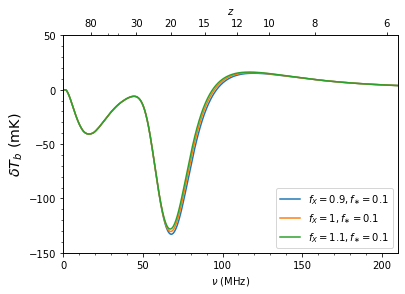

In [13]:
import time
start_time = time.time()

import numpy as np
ax = None
# nfx = 3  ## number of iterations for fx
fx_step = 0.1
fx_fiducial = 1 
fxs = np.array([fx_fiducial-fx_step,fx_fiducial,fx_fiducial+fx_step])

# lenz = len(sim.history['z'])
lenz = 2588
# len(sim.history['z']) or 2588
### dTbs: 2d array for saving dTb for different fxs
dTbs = np.zeros([nfx,lenz])

for i, fX in enumerate(fxs):
    for j, fstar in enumerate([0.1]):
        sim = ares.simulations.Global21cm(fX=fX, fstar=fstar)
        sim.run()
        dTbs[i][:] = sim.history['dTb']
#         print(i, fX, j, fstar)
        
        # Plot the global signal
        ax, zax = sim.GlobalSignature(ax=ax, fig=3, z_ax=i==j==0,
            label=r'$f_X=%.2g, f_{\ast}=%.2g$' % (fX, fstar))


ax.legend(loc='lower right', fontsize=10)
plt.savefig('ares_gs_diy_param_study.pdf')

print("--- %s seconds ---" % (time.time() - start_time))

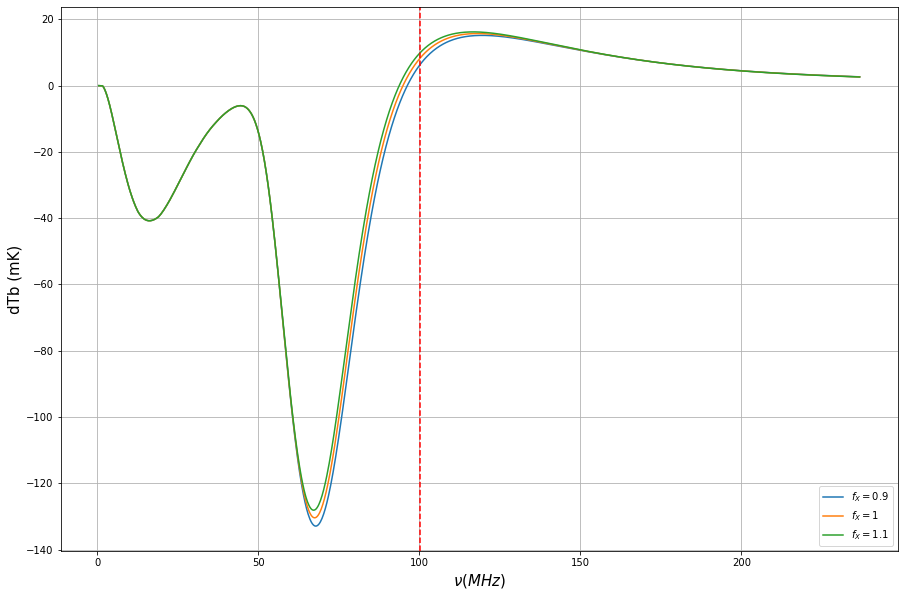

In [14]:
# print(dTbs,'\n')
plt.subplots(figsize=(15,10))
nu = sim.history['nu']

for i in range(dTbs.shape[0]):
    plt.plot(nu, dTbs[i][:], 
             label=r'$f_X=%.3g$' %fxs[i])
plt.axvline(x=100.07126795356919, color= 'r', linestyle='--')
plt.xlabel(r'$\nu (MHz)$', fontsize= 15);plt.ylabel('dTb (mK)', fontsize= 15)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.savefig('dTb_vs_nu.pdf')
# print(dTbs.shape[0], dTbs.shape[1])

In [16]:
len(nu)

2588

In [17]:
fxs

array([0.9, 1. , 1.1])